In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from scipy import stats
from math import nan, isnan
from scipy.stats import norm
import statsmodels.formula.api as sm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


url = 'https://github.com/Nemo-sop/CoderHouse-DataScience/blob/main/House_prices_train.csv?raw=true'
df = pd.read_csv(url,index_col=0, encoding = "ISO-8859-1")

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 80)

df.sample(7) 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
614,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206,Unf,0,914,1120,GasA,Ex,Y,SBrkr,1120,0,0,1120,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,Partial,147000
554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1290,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,788.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,1085,1085,GasA,Ex,Y,SBrkr,1120,850,0,1970,0,0,2,1,3,1,Ex,8,Typ,1,Gd,BuiltIn,2006.0,Fin,3,753,TA,TA,Y,177,74,0,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial,281000
302,60,RL,66.0,16226,Pave,NaN,IR3,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,281,Unf,0,747,1028,GasA,Ex,Y,SBrkr,1210,1242,0,2452,0,0,2,1,4,1,Gd,9,Typ,1,TA,BuiltIn,1998.0,Fin,2,683,TA,TA,Y,208,50,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,267000
264,50,RM,50.0,5500,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,7,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,234,ALQ,692,0,926,GasA,TA,Y,SBrkr,926,0,390,1316,1,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1974.0,Unf,2,484,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,130000
1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1404,20,RL,49.0,15256,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,84.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,929,Unf,0,556,1485,GasA,Ex,Y,SBrkr,1464,0,0,1464,1,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Unf,3,754,TA,TA,Y,168,160,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,282922


Label Encoding

In [2]:
# First we obtain every column name with categorical data for us to preprocess
objList = df.select_dtypes(include = "object").columns
print("Columns with categorical data:" , len(objList))
objList

Columns with categorical data: 43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [3]:
# Now we use label encodig to make the categorical data pass as numbers so we can evaluate all features.
# (Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form)

le = preprocessing.LabelEncoder()

for i in objList:
  df[i] = le.fit_transform(df[i])

df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
732,80,3,73.0,9590,1,2,0,3,0,0,0,23,2,2,0,7,7,5,2003,2003,1,1,12,13,1,442.0,2,4,2,0,3,0,2,786,5,0,82,868,1,0,1,4,1146,0,0,1146,1,0,2,0,3,1,2,6,6,1,2,1,2003.0,0,2,438,4,4,2,160,22,0,0,0,0,3,4,4,0,5,2007,8,4,187500
886,120,1,50.0,5119,1,2,0,3,0,1,0,21,2,2,4,2,9,5,1999,2000,1,1,8,8,1,60.0,2,4,2,0,3,0,2,1238,5,0,460,1698,1,0,1,4,1709,0,0,1709,1,0,2,0,2,1,2,5,6,1,4,1,1999.0,0,2,506,4,4,2,97,65,0,0,0,0,3,4,4,0,1,2008,1,0,328900
221,20,3,73.0,8990,1,2,0,3,0,4,0,5,2,2,0,2,7,5,2006,2006,1,1,12,13,2,0.0,2,4,2,2,3,2,5,0,5,0,1498,1498,1,0,1,4,1498,0,0,1498,0,0,2,0,2,1,2,5,6,0,5,1,2006.0,1,2,675,4,4,2,351,33,0,0,0,0,3,4,4,0,4,2006,6,5,204900
528,60,3,67.0,14948,1,2,0,3,0,4,0,16,2,2,0,5,9,5,2008,2008,3,1,12,13,3,268.0,0,4,2,0,3,0,2,1330,5,0,122,1452,1,0,1,4,1476,1237,0,2713,1,0,2,1,3,1,0,11,6,1,2,1,2008.0,0,3,858,4,4,2,126,66,0,0,0,0,3,4,4,0,11,2008,6,5,446261
1254,60,3,NaN,17542,1,2,0,3,0,4,0,24,2,2,0,5,7,7,1974,2003,1,1,13,14,2,0.0,2,4,1,3,3,1,3,125,0,1031,36,1192,1,4,1,4,1516,651,0,2167,1,0,2,1,3,1,2,9,6,2,2,1,1974.0,1,2,518,4,4,2,220,47,0,0,0,0,3,2,4,0,7,2007,8,4,294000


In [4]:
# We have missing data, to trear this first we are going to remove the rows with missing information to see how much we would lose

df_without_nan = df.dropna(axis=0)
loss = df.shape[0] - df_without_nan.shape[0]
print("Columns with missing data: ", loss)
print("Percentage of the data loss: ", loss/df.shape[0]*100, "%")

Columns with missing data:  339
Percentage of the data loss:  23.219178082191778 %


In [5]:
# As 23% is a large amount of our data we are going to try and save as much as possible with other techniques such as imputation with the mean

# First we need to know wich columns contain missing data
columns_with_nan = df.columns[df.isna().any()].tolist()
print(columns_with_nan)

# Now we have to check if the columns with missin data are categorical because if we take the mean it may be somethig without sense
for i in columns_with_nan:
  if i in objList:
    print("We have a problem with ", i)
  else:
    print("All good with", i)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
All good with LotFrontage
All good with MasVnrArea
All good with GarageYrBlt


In [6]:
# Now we complete the missing data with the mean of their respective columns

# Mean imputation disadvantages:
# Mean imputation reduces the variance of the imputed variables.
# Mean imputation shrinks standard errors, which invalidates most hypothesis tests and the calculation of confidence interval.
# Mean imputation does not preserve relationships between variables such as correlations.

# Despite of its serious disadvanteges we consider that it is better aproach than deleting all registers with a missing data point mainly beacause of the size of our dataset (it is somewhat small for some model trainings)

df_completed_mean = df
for i in columns_with_nan:

  df_completed_mean[i]=df_completed_mean[i].fillna(df_completed_mean[i].mean())

df_completed_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
# Next, we'll define the model by using SelectKBest class. For classification we'll set 'f_regression'  method as a scoring function. 
# The target number of features is defined by k parameter (wich we are going to omit to give the algorithm more freedom). 
# Then we'll fit and transform method on training x and y data.

x = df_completed_mean.loc[:, df_completed_mean.columns != 'SalePrice']
y = df_completed_mean["SalePrice"]

print("Feature data dimension: ", x.shape)

select = SelectKBest(score_func=f_regression)
z = select.fit_transform(x,y)
 
print("After selecting best 3 features:", z.shape)

Feature data dimension:  (1460, 79)
After selecting best 3 features: (1460, 10)


In [8]:
# To identify the selected features we use get_support() function and filter out them from the features name list.
filter = select.get_support()
features = (x.columns)
 
print("All features:")
print(features)
 
print("Selected best:")
print(features[filter])

All features:
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pa

In [9]:
print(df[features[filter]].iloc[:,:-1])

      OverallQual  ExterQual  BsmtQual  TotalBsmtSF  1stFlrSF  GrLivArea  \
Id                                                                         
1               7          2         2          856       856       1710   
2               6          3         2         1262      1262       1262   
3               7          2         2          920       920       1786   
4               7          3         3          756       961       1717   
5               8          2         2         1145      1145       2198   
...           ...        ...       ...          ...       ...        ...   
1456            6          3         2          953       953       1647   
1457            6          3         2         1542      2073       2073   
1458            7          0         3         1152      1188       2340   
1459            5          3         3         1078      1078       1078   
1460            5          2         3         1256      1256       1256   

      FullB

When applying a model, we first proposed a decision tree, however, after spending 20 minutes to train this model, we realized that it was not the best and that, on the contrary, a linear regression would be better to be able to predict the housing price much better


The reason of this beeing the amount of categorical data we had to transform

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

#We will be working with this 
X = df[features[filter]].iloc[:,:-1]
y = df["SalePrice"]

# Divide de entire DataSet into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


lr = linear_model.LinearRegression()
#Training the model
lr.fit(X_train, y_train)
#Now we use this modelo to predict
y_pred = lr.predict(X_test)

print("Linear model score: ", lr.score(X_test, y_test))

Linear model score:  0.8245361625888531


Although we still need to improve on this issue of validating whether a model is good or could be better, if we are having an R² value of 0.8, which is not bad, clearly this shows us that for this particular case a regression was better than a decision tree

We will continue with a diferent idea,w e propose an alternative problem, say we are on a budget and want to predict if it is enough to buy a house with hypotetical characteristics


Logistic regresion score:  0.8972602739726028


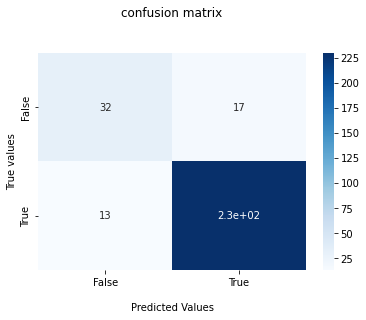

In [29]:
# Now we propose an alternative problem, say we have a budget. We want to predict if it is enough to buy a house with hypotetical characteristics

from sklearn.metrics import confusion_matrix
import seaborn as sns

def predict_on_budget(budget):

  # First we have to treat the data as for the model to predit yes/no for our budget
  x_budget_model = df_completed_mean[features[filter]].iloc[:,:-1]
  y_budget_model = df_completed_mean['SalePrice'].gt(budget)

  # We split the data into train and test
  x_train_budget_model, x_test_budget_model, y_train_budget_model, y_test_budget_model = train_test_split(x_budget_model, y_budget_model, test_size=0.2)

  # We create the model
  model = LogisticRegression(solver='liblinear', random_state=0)

  # We train the model
  model.fit(x_train_budget_model, y_train_budget_model)

  # We test the model
  y_pred_budget_model = model.predict(x_test_budget_model)
  #print(model.predict(x_test_budget_model))
  
  # We analyze its results:
  print("Logistic regresion score: ", model.score(x_test_budget_model, y_test_budget_model))
  
  # We can see the confusion matrix:  (zero=false, one=true)
  # (0, 0) true negative predictions, are zeros predicted correctly 
  # (1, 0) false negative predictions, ones wrongly predicted as zeros
  # (0, 1) false positive prediction, zeros that were wrongly predicted as ones
  # (1, 1) true positive predictions, ones predicted correctly
  return confusion_matrix(y_test_budget_model, model.predict(x_test_budget_model))

r = predict_on_budget(123456)

ax = sns.heatmap(r, annot=True, cmap='Blues')
ax.set_title('confusion matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True values')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()



Now with this function we can predict if it is enough to buy a house with a certain budget,using a logistic regression, in addition we have some measures to see the error of the implemented regression model

In the future we would like to expand this idea and see if it will be possible to buy a house with a certain budget but with certain specifications or characteristics.